<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_estrazione_features_PCA_da_jpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estrazione delle features tramite PCA, da un set di immagini nwh (num, larg, alt) (Greyscale)

In [ ]:
# Scarico i file delle varie classi di immagini jpg
#train
!wget https://www.dropbox.com/s/asr619m9pigl2hh/train_angry.zip?dl=0
!wget https://www.dropbox.com/s/uy95xax12bug0df/train_disgust.zip?dl=0
!wget https://www.dropbox.com/s/hsdhrpgk2o3h95b/train_fear.zip?dl=0
!wget https://www.dropbox.com/s/6hlkk4y9b4e6oef/train_happy.zip?dl=0
!wget https://www.dropbox.com/s/lqvzefuiyb3nr6p/train_neutral.zip?dl=0
!wget https://www.dropbox.com/s/4xj4dfhh6nd88uq/train_sad.zip?dl=0
!wget https://www.dropbox.com/s/nfphtfuezqs6930/train_surprise.zip?dl=0

!unzip train_angry.zip?dl=0
!unzip train_disgust.zip?dl=0
!unzip train_fear.zip?dl=0
!unzip train_happy.zip?dl=0
!unzip train_neutral.zip?dl=0
!unzip train_sad.zip?dl=0
!unzip train_surprise.zip?dl=0

# Scarico file di test
!wget https://www.dropbox.com/s/zy4caktxitsk2nd/test_angry.zip?dl=0
!wget https://www.dropbox.com/s/gfeos1j8akykpps/test_disgust.zip?dl=0
!wget https://www.dropbox.com/s/7zg9lsbppy0aprf/test_fear.zip?dl=0
!wget https://www.dropbox.com/s/w2pjbyvh0x8s2zj/test_happy.zip?dl=0
!wget https://www.dropbox.com/s/ca86hlz8tkgjl70/test_neutral.zip?dl=0
!wget https://www.dropbox.com/s/p85mypgujhmfq26/test_sad.zip?dl=0
!wget https://www.dropbox.com/s/sp7975d2art8ivt/test_surprise.zip?dl=0
!unzip test_angry.zip?dl=0
!unzip test_disgust.zip?dl=0
!unzip test_fear.zip?dl=0
!unzip test_happy.zip?dl=0
!unzip test_neutral.zip?dl=0
!unzip test_sad.zip?dl=0
!unzip test_surprise.zip?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: test_happy/PrivateTest_22689070.jpg  
 extracting: test_happy/PrivateTest_22929697.jpg  
 extracting: test_happy/PrivateTest_22938435.jpg  
 extracting: test_happy/PrivateTest_22979298.jpg  
 extracting: test_happy/PrivateTest_2309763.jpg  
 extracting: test_happy/PrivateTest_23250597.jpg  
 extracting: test_happy/PrivateTest_23282756.jpg  
 extracting: test_happy/PrivateTest_23344981.jpg  
 extracting: test_happy/PrivateTest_23400117.jpg  
 extracting: test_happy/PrivateTest_2352334.jpg  
 extracting: test_happy/PrivateTest_23574753.jpg  
 extracting: test_happy/PrivateTest_23578691.jpg  
 extracting: test_happy/PrivateTest_23631554.jpg  
 extracting: test_happy/PrivateTest_23782289.jpg  
 extracting: test_happy/PrivateTest_23900877.jpg  
 extracting: test_happy/PrivateTest_2390435.jpg  
 extracting: test_happy/PrivateTest_23955431.jpg  
 extracting: test_happy/PrivateTest_24030799.jpg  
 extracting: test_happy/PrivateTes

In [ ]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np

# LISTE DI IMMAGINI jpg
# Raccolgo le immagini di uno specifico insieme (espressione del viso)
# creando una lista di immagini contenenti solo immagini di quell'insieme
# train
list_train_angry_images = sorted(glob('train_angry/*.jpg'))
list_train_disgust_images = sorted(glob('train_disgust/*.jpg'))
list_train_fear_images = sorted(glob('train_fear/*.jpg'))
list_train_happy_images = sorted(glob('train_happy/*.jpg'))
list_train_neutral_images = sorted(glob('train_neutral/*.jpg'))
list_train_sad_images = sorted(glob('train_sad/*.jpg'))
list_train_surprise_images = sorted(glob('train_surprise/*.jpg'))

# test
list_test_angry_images = sorted(glob('test_angry/*.jpg'))
list_test_disgust_images = sorted(glob('test_disgust/*.jpg'))
list_test_fear_images = sorted(glob('test_fear/*.jpg'))
list_test_happy_images = sorted(glob('test_happy/*.jpg'))
list_test_neutral_images = sorted(glob('test_neutral/*.jpg'))
list_test_sad_images = sorted(glob('test_sad/*.jpg'))
list_test_surprise_images = sorted(glob('test_surprise/*.jpg'))

In [ ]:
import sys
from numpy import save

# riunisco in un unica lista train e in un unica lista test le varie classi train e test (liste di immagini)
list_train_images = [*list_train_angry_images,*list_train_disgust_images,*list_train_fear_images,*list_train_happy_images,*list_train_neutral_images,*list_train_sad_images,*list_train_surprise_images]
list_test_images = [*list_test_angry_images,*list_test_disgust_images,*list_test_fear_images,*list_test_happy_images,*list_test_neutral_images,*list_test_sad_images,*list_test_surprise_images]

# trasformo le liste di immagini in liste di immagini nwh       
list_train_images_nwh = []
for i in range(len(list_train_images)):
  list_train_images_nwh.append(cv2.imread(list_train_images[i], cv2.IMREAD_GRAYSCALE))

list_test_images_nwh = []
for i in range(len(list_test_images)):
  list_test_images_nwh.append(cv2.imread(list_test_images[i], cv2.IMREAD_GRAYSCALE))


In [ ]:
print(np.shape(list_train_images_nwh))
print(np.shape(list_test_images_nwh))

(31805, 48, 48)
(7178, 48, 48)


In [ ]:
# trasformo le liste in array
array_train_images_nwh = np.array(list_train_images_nwh)
array_test_images_nwh = np.array(list_test_images_nwh)

In [ ]:
print(np.shape(array_train_images_nwh))
print(np.shape(array_test_images_nwh))
print("train")
print(array_train_images_nwh[2])
print("test")
print(array_test_images_nwh[2])

(31805, 48, 48)
(7178, 48, 48)
train
[[255 255 255 ...  76  90  88]
 [255 255 255 ...  80  92  85]
 [255 255 255 ...  90  93  92]
 ...
 [ 28  24  31 ...  39  40  30]
 [ 27  21  44 ...  39  35  37]
 [ 16  20  50 ...  37  37  37]]
test
[[123 123 126 ...  52  46  43]
 [116 115 116 ...  52  49  51]
 [105 107 109 ...  57  57  60]
 ...
 [ 96  98  97 ...   1   2   3]
 [ 87  90  90 ...   1   2   1]
 [ 78  81  84 ...   4   4   3]]


In [ ]:
# Creo una lista di etichette(label) con tutti gli insiemi di immagini 
# e assegno a tutti gli elementi della lista un numero da 0 a 6 (7 insiemi), a seconda dell'insieme

list_train_labels = []
for i in range(len(list_train_angry_images)):
  list_train_labels.append(0)
for i in range(len(list_train_disgust_images)):
  list_train_labels.append(1)
for i in range(len(list_train_fear_images)):
  list_train_labels.append(2)
for i in range(len(list_train_happy_images)):
  list_train_labels.append(3)
for i in range(len(list_train_neutral_images)):
  list_train_labels.append(4)
for i in range(len(list_train_sad_images)):
  list_train_labels.append(5)
for i in range(len(list_train_surprise_images)):
  list_train_labels.append(6)

list_test_labels = []
for i in range(len(list_test_angry_images)):
  list_test_labels.append(0)
for i in range(len(list_test_disgust_images)):
  list_test_labels.append(1)
for i in range(len(list_test_fear_images)):
  list_test_labels.append(2)
for i in range(len(list_test_happy_images)):
  list_test_labels.append(3)
for i in range(len(list_test_neutral_images)):
  list_test_labels.append(4)
for i in range(len(list_test_sad_images)):
  list_test_labels.append(5)
for i in range(len(list_test_surprise_images)):
  list_test_labels.append(6)

In [ ]:
# trasformo le liste in np.array

array_train_labels = np.array(list_train_labels)
array_test_labels = np.array(list_test_labels)

In [ ]:
print(np.shape(array_train_labels))
print(np.shape(array_test_labels))

(31805,)
(7178,)


In [ ]:
# Stampo dimensione liste di training
print("Dimensione liste di training:\n")
print(np.shape(list_train_angry_images))
print(np.shape(list_train_disgust_images))
print(np.shape(list_train_fear_images))
print(np.shape(list_train_happy_images))
print(np.shape(list_train_neutral_images))
print(np.shape(list_train_sad_images))
print(np.shape(list_train_surprise_images))

# Stampo dimensione liste di test
print("\nDimensione liste di test:\n")
print(np.shape(list_test_angry_images))
print(np.shape(list_test_disgust_images))
print(np.shape(list_test_fear_images))
print(np.shape(list_test_happy_images))
print(np.shape(list_test_neutral_images))
print(np.shape(list_test_sad_images))
print(np.shape(list_test_surprise_images))

print("liste images\n")
print(np.shape(list_train_images))
print(np.shape(list_test_images))
print("liste images nwhc\n")
print("liste labels\n")
print(np.shape(list_train_labels))
print(np.shape(list_test_labels))
#print(list_train_labels)
#print(list_test_labels)
print(list_train_angry_images[:1])
print(list_train_images[:1])


Dimensione liste di training:

(4355,)
(520,)
(4529,)
(7995,)
(5433,)
(5370,)
(3603,)

Dimensione liste di test:

(958,)
(111,)
(1024,)
(1774,)
(1233,)
(1247,)
(831,)
liste images

(31805,)
(7178,)
liste images nwhc

liste labels

(31805,)
(7178,)
['train_angry/PrivateTest_10131363.jpg']
['train_angry/PrivateTest_10131363.jpg']


FEATURES CON PCA

In [ ]:
# Carico in memoria i file del dataset

x_train = array_train_images_nwh
y_train = array_train_labels

x_test = array_test_images_nwh
y_test = array_test_labels

In [ ]:
#np.save('array_train_labels.npy', y_train)
#np.save('array_test_labels.npy', y_test)

In [ ]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])

(31805, 48, 48)
(31805,)
(7178, 48, 48)
(7178,)
[[255 255 255 ...  76  90  88]
 [255 255 255 ...  80  92  85]
 [255 255 255 ...  90  93  92]
 ...
 [ 28  24  31 ...  39  40  30]
 [ 27  21  44 ...  39  35  37]
 [ 16  20  50 ...  37  37  37]]
[[123 123 126 ...  52  46  43]
 [116 115 116 ...  52  49  51]
 [105 107 109 ...  57  57  60]
 ...
 [ 96  98  97 ...   1   2   3]
 [ 87  90  90 ...   1   2   1]
 [ 78  81  84 ...   4   4   3]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
im_w = x_train.shape[1]
im_h = x_train.shape[2]

print(np.shape(x_train))
print("N Obj:", nobj)
print("Im weight:", im_w)
print("Im height:", im_h)


(31805, 48, 48)
N Obj: 31805
Im weight: 48
Im height: 48


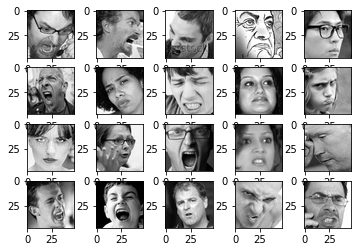

In [ ]:
# Mostro le prime 20 espressioni del dataset di train
rows = 4
columns = 5
fig = plt.figure()
ax = []
for i in range(columns*rows):
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(x_train[i], cmap='gray')

plt.show()

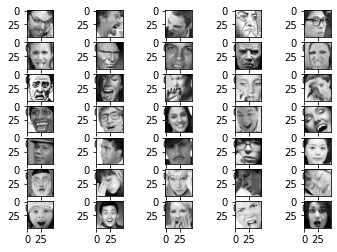

In [ ]:
# Mostro le prime 5 espressioni di ogni classe del dataset di train
rows = 7
columns = 5
fig = plt.figure()
ax = []
positions = [4355,520,4529,7995,5433,5370,3603]
counter_fig = 0
counter_classe = 0
counter_pos = 0
counter_sum = 0

for i in range(columns*rows):
  # create subplot and append to ax
  ax.append( fig.add_subplot(rows, columns, i+1) )
  plt.imshow(x_train[counter_pos], cmap='gray')
  counter_fig += 1
  counter_pos += 1
  #print('counter_fig counter_pos',counter_fig, counter_pos)
  if counter_fig >= 5:
    #print('inizio if\n')
    counter_sum += positions[counter_classe]
    #print('counter_sun', counter_sum)
    counter_classe += 1
    #print('counter_classe', counter_classe)
    counter_fig = 0
    #print('counter_fig', counter_fig)
    counter_pos = counter_sum + 2
    #print('counter_pos', counter_pos)

plt.show()


In [ ]:
# "Appiattisco" i dati: matrice bidimensionale con righe = oggetti, colonne = feature
X = np.reshape(x_train, (nobj,im_w*im_h))
print(np.shape(X))

(31805, 2304)


In [ ]:
# Implemento la PCA: devo calcolare la matrice di trasformazione T
# stimata dai dati di train

# Calcolo la media di ogni feature e centro i dati
m = np.mean(X,axis=0)
Xc = X - m

# Calcolo la matrice di covarianza dei dati centrati
C = np.cov(Xc, rowvar=False)  

# Calcolo autovalori e autovettori della matrice di covarianza

lambdas,U = np.linalg.eigh(C)


# Ordino gli autovalori dal più grande al più piccolo
best_eig_idxs = np.argsort(lambdas)[::-1]
best_eig = lambdas[best_eig_idxs]
best_U = U[:,best_eig_idxs]

(31805, 300)


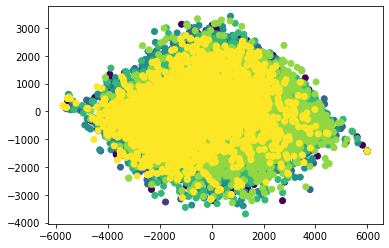

In [ ]:
# Costruisco la matrice di trasformazione T: 
# - in colonna gli autovettori corrispondenti ai N... autovalori più grandi
T = best_U[:,:300]

# Applico la trasformazione ai dati di train, faccio uno scatter plot dei dati trasformati
# N.B.: la trasformazione si esegue moltiplicando i dati per la matrice di trasformazione T
XT = np.dot(Xc, T)
print(np.shape(XT))
plt.scatter(XT[:,0],XT[:,1], c=y_train)
plt.show()
#np.save('features_train_PCA_300.npy', XT)

In [ ]:
# Applico la trasformazione ai dati di test

nobj_test = x_test.shape[0]
print(np.shape(nobj_test))

X_test = np.reshape(x_test, (nobj_test, im_w*im_h))

Xc_test = X_test - m

XT_test = np.dot(Xc_test, T)
print(np.shape(XT_test))
#np.save('features_test_PCA_300.npy', XT_test)

()
(7178, 300)


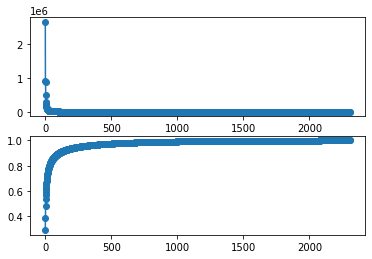

In [ ]:
# Come scelgo il numero giusto di autovalori per la mia matrice di Trasformazione

#Ordino i miei autovalori

D_ord = np.sort(lambdas)[::-1]
d = D_ord.shape[0]

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(1,d+1),D_ord)
axs[0].scatter(np.arange(1,d+1),D_ord)

y = np.cumsum(D_ord)/np.sum(D_ord)
axs[1].plot(np.arange(1,d+1),y)
axs[1].scatter(np.arange(1,d+1),y)

plt.show()
